<a href="https://colab.research.google.com/github/Bladimir0005/Entregable/blob/main/RNNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07MIAR - Redes Neuronales y Deep Learning: Proyecto de programación "*Deep Vision in classification tasks*"


## Enunciado

En esta actividad, el alumno debe **evaluar y comparar dos estrategias** para la **clasificación de imágenes** empleando el **dataset asignado**. El/La alumnx deberá resolver el reto proponiendo una solución válida **basada en aprendizaje profundo**, más concretamente en redes neuronales convolucionales (**CNNs**). Será indispensable que la solución propuesta siga el **pipeline visto en clase** para resolver este tipo de tareas de inteligencia artificial:

1.   **Carga** del conjunto de datos
2.   **Inspección** del conjunto de datos
3.   **Acondicionamiento** del conjunto de datos
4.   Desarrollo de la **arquitectura** de red neuronal y **entrenamiento** de la solución
5.   **Monitorización** del proceso de **entrenamiento** para la toma de decisiones
6.   **Evaluación** del modelo predictivo y planteamiento de la siguiente prueba experimental

### Estrategia 1: Entrenar desde cero o *from scratch*

La primera estrategia a comparar será una **red neuronal profunda** que el **alumno debe diseñar, entrenar y optimizar**. Se debe **justificar empíricamente** las decisiones que llevaron a la selección de la **arquitectura e hiperparámetros final**. Se espera que el alumno utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).

### Estrategia 2: Red pre-entrenada

La segunda estrategia a comparar debe incluir la utilización de una **red preentrenada** con el dataset ImageNet, llevando a cabo tareas de ***transfer learning*** y ***fine-tuning*** para resolver la tarea de clasificación asignada. Deben **compararse al menos dos tipos de arquitecturas** (VGGs, ResNet50, Xception, InceptionV3, InceptionResNetV2, MobileNetV2, DenseNet, ResNet) y se debe **seleccionar la que mayor precisión proporcione** (información sobre las arquitecturas disponibles en https://keras.io/applications/). Se espera que el/la alumnx utilice todas las **técnicas de regularización** mostradas en clase de forma justificada para la mejora del rendimiento de la red neuronal (*weight regularization*, *dropout*, *batch normalization*, *data augmentation*, etc.).


## Normas a seguir

- Será **indispensable** realizar el **trabajo por parejas**. Dichas parejas de alumnxs se generarán **de manera automática** teniendo en cuenta el pais de residencia con el objetivo de facilitar el trabajo en equipo.  
- Se debe entregar un **ÚNICO FICHERO PDF POR ALUMNO** que incluya las instrucciones presentes en el Colab Noteboook y su **EJECUCIÓN!!!**. Debe aparecer todo el proceso llevado a cabo en cada estrategia (i.e. carga de datos, inspección de datos, acondicionamiento, proceso de entrenamiento y proceso de validación del modelo).
- **La memoria del trabajo** (el fichero PDF mencionado en el punto anterior) deberá **subirla cada integrante del grupo** (aunque se trate de un documento idéntico) a la actividad que se habilitará **en CampusVIU**.
- Se recomienda trabajar respecto a un directorio base (**BASE_FOLDER**) para facilitar el trabajo en equipo. En este notebook se incluye un ejemplo de cómo almacenar/cargar datos utilizando un directorio base.
- Las **redes propuestas** deben estar **entrenadas** (y **EVIDENCIAR este proceso en el documento PDF**). La entrega de una **red sin entrenar** supondrá **perdida de puntos**.
- Si se desea **evidenciar alguna métrica** del proceso de entrenamiento (precisión, pérdida, etc.), estas deben ser generadas.
- Todos los **gráficos** que se deseen mostrar deberán **generarse en el Colab Notebook** para que tras la conversión aparezcan en el documento PDF.

## *Tips* para realizar la actividad con éxito
- Los **datos** se cargarán directamente **desde** la plataforma **Kaggle** mediante su API (https://github.com/Kaggle/kaggle-api). En este Notebook se incluye un ejemplo de como hacerlo. Se recomienda generar una función que aborde esta tarea.
- El **documento PDF a entregar** como solución de la actividad se debe **generar automáticamente desde el fichero ".ipynb"**. En este Notebook se incluye un ejemplo de como hacerlo.
- **Generar secciones y subsecciones en el Colab Notebook** supondrá que el documento **PDF generado** queda totalmente **ordenado** facilitando la evaluación al docente.
- Se recomienda encarecidamente **incluir comentarios concisos pero aclaratorios**.
- Es muy recomendable crear una **última sección** de texto en el Colab Notebook en la que se discutan los diferentes modelos obtenidos y se extraigan las conclusiones pertinentes.

## Criterios de evaluación

- **Seguimiento** de las **normas establecidas** en la actividad (detalladas anteriormente).
- Creación de una **solución que resuelva la tarea de clasificación**, i.e. que las figuras de mérito empleadas para medir la bondad del modelo predictivo evidencien un *performance* superior al rendimiento estocástico.
- **Claridad** en la creación de la solución, en las justificaciones sobre la toma de decisiones llevada a cabo así como en las comparativas y conclusiones finales.
- **Efectividad** al presentar las comparaciones entre métricas de evaluación de ambas estrategias.
- **Demostración** de la utilización de **técnicas de regularización** para mejorar el rendimiento de los modelos.

Introduccion

## El objetivo de este proyecto es evaluar y comparar dos enfoques distintos para la tarea de clasificacion de imagenes mediante el uso de tecnicas de aprendizaje profundo, con la utilizacion de redes neuronales convulcionales (CNNs). Se implementaran y analizaran las siguientes estrategias:
1. Entrenamiento desde cero (from scratch): Diseño, entrenamiento y optimizacion de una red neuronal profundo personalizado.
2. Transfer Learning con redes preentrenadas: Adaptacion y ajuste fino (fine-tuning) de arquitecturas preentrenadas sobre el dataset Grupo1

## Estrategia 2

## Importar librerias

In [2]:
from zipfile import ZipFile
from google.colab import drive
import os
from google.colab import files
from collections import Counter
import shutil
import random
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16, ResNet50, Xception
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

## 1. Carga e Inspeccion del Dataset

In [3]:
drive.mount('/content/drive')

BASE_FOLDER = "/content/drive/MyDrive/Proyecto_Redes_Neuronales/"

# Nos aseguramos de que la carpeta exista, si no, la creamos.
import os
os.makedirs(BASE_FOLDER, exist_ok=True)
print(f"Carpeta de trabajo configurada en: {BASE_FOLDER}")

Mounted at /content/drive
Carpeta de trabajo configurada en: /content/drive/MyDrive/Proyecto_Redes_Neuronales/


In [4]:
# Celda 2: Subir y configurar el token de Kaggle
!pip install -q kaggle # Instala la librería de Kaggle

from google.colab import files
print("Por favor, sube el archivo 'kaggle.json' que descargaste de tu cuenta de Kaggle.")
files.upload()

# Movemos el token a la carpeta que Kaggle espera
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json # Damos los permisos adecuados al archivo

print("\n¡Configuración de la API de Kaggle completada!")

Por favor, sube el archivo 'kaggle.json' que descargaste de tu cuenta de Kaggle.


Saving kaggle.json to kaggle.json

¡Configuración de la API de Kaggle completada!


In [5]:
# Celda 3: Descargar y descomprimir los datos
# Usaremos el dataset 'dogs-vs-cats-redux-kernels-edition' como se recomienda.
COMPETITION_NAME = 'plant-seedlings-classification'

print(f"Descargando el dataset: {COMPETITION_NAME}...")
!kaggle competitions download -c {COMPETITION_NAME}

# Creamos un directorio para organizar los datos originales
RAW_DATA_DIR = 'raw_data'
os.makedirs(RAW_DATA_DIR, exist_ok=True)

# Descomprimimos el archivo principal
print("\nDescomprimiendo archivo principal...")
!unzip -q {COMPETITION_NAME}.zip -d {RAW_DATA_DIR}

# En este caso, los datos están en una carpeta "train" ya descomprimida
print(f"\n¡Datos listos! Contenido de la carpeta '{RAW_DATA_DIR}':")
!ls {RAW_DATA_DIR}

print(f"\n¡Datos listos! Contenido de la carpeta '{RAW_DATA_DIR}':")
!ls {RAW_DATA_DIR}



Descargando el dataset: plant-seedlings-classification...
100% 1.68G/1.69G [00:19<00:00, 242MB/s]
100% 1.69G/1.69G [00:19<00:00, 94.1MB/s]

Descomprimiendo archivo principal...

¡Datos listos! Contenido de la carpeta 'raw_data':
sample_submission.csv  test  train

¡Datos listos! Contenido de la carpeta 'raw_data':
sample_submission.csv  test  train


## 2. Preprocesamiento y Acondicionamiento

In [6]:
# Celda: Crear estructura de directorios y dividir los datos de plant-seedlings-classification

print("Iniciando la estructuración de directorios para el dataset de plántulas...")

# Directorio donde están las carpetas de clases
SOURCE_DIR = os.path.join('raw_data', 'train')

# Verificación rápida
if not os.path.isdir(SOURCE_DIR):
    raise FileNotFoundError(f"No existe el directorio de origen: {SOURCE_DIR}. Asegúrate de haber descargado y descomprimido correctamente los datos.")

# Directorio base de salida
STRUCTURED_DATA_DIR = 'data_structured'
TRAIN_DIR = os.path.join(STRUCTURED_DATA_DIR, 'train')
VALIDATION_DIR = os.path.join(STRUCTURED_DATA_DIR, 'validation')
TEST_DIR = os.path.join(STRUCTURED_DATA_DIR, 'test')

# Proporciones de división
TRAIN_SPLIT = 0.7
VALIDATION_SPLIT = 0.15

# Clases = nombres de carpetas
CLASSES = [cls for cls in os.listdir(SOURCE_DIR) if os.path.isdir(os.path.join(SOURCE_DIR, cls))]

# Limpiar estructura previa
if os.path.exists(STRUCTURED_DATA_DIR):
    shutil.rmtree(STRUCTURED_DATA_DIR)

# Crear estructura de carpetas vacías
for base_dir in [TRAIN_DIR, VALIDATION_DIR, TEST_DIR]:
    for cls in CLASSES:
        os.makedirs(os.path.join(base_dir, cls), exist_ok=True)

# Dividir y copiar los archivos
for cls in CLASSES:
    class_path = os.path.join(SOURCE_DIR, cls)
    images = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    random.seed(42)
    random.shuffle(images)

    n = len(images)
    train_end = int(n * TRAIN_SPLIT)
    val_end = int(n * (TRAIN_SPLIT + VALIDATION_SPLIT))

    train_files = images[:train_end]
    val_files = images[train_end:val_end]
    test_files = images[val_end:]

    def copy_files(file_list, dest_root):
        for f in file_list:
            src = os.path.join(class_path, f)
            dst = os.path.join(dest_root, cls, f)
            shutil.copy(src, dst)

    copy_files(train_files, TRAIN_DIR)
    copy_files(val_files, VALIDATION_DIR)
    copy_files(test_files, TEST_DIR)

print("\n ¡Estructura de directorios creada exitosamente!")
for cls in CLASSES:
    print(f" {cls}:")
    print(f"  Entrenamiento: {len(os.listdir(os.path.join(TRAIN_DIR, cls)))} imágenes")
    print(f"  Validación:    {len(os.listdir(os.path.join(VALIDATION_DIR, cls)))} imágenes")
    print(f"  Test:          {len(os.listdir(os.path.join(TEST_DIR, cls)))} imágenes")


Iniciando la estructuración de directorios para el dataset de plántulas...

 ¡Estructura de directorios creada exitosamente!
 Maize:
  Entrenamiento: 154 imágenes
  Validación:    33 imágenes
  Test:          34 imágenes
 Sugar beet:
  Entrenamiento: 269 imágenes
  Validación:    58 imágenes
  Test:          58 imágenes
 Small-flowered Cranesbill:
  Entrenamiento: 347 imágenes
  Validación:    74 imágenes
  Test:          75 imágenes
 Scentless Mayweed:
  Entrenamiento: 361 imágenes
  Validación:    77 imágenes
  Test:          78 imágenes
 Common wheat:
  Entrenamiento: 154 imágenes
  Validación:    33 imágenes
  Test:          34 imágenes
 Fat Hen:
  Entrenamiento: 332 imágenes
  Validación:    71 imágenes
  Test:          72 imágenes
 Black-grass:
  Entrenamiento: 184 imágenes
  Validación:    39 imágenes
  Test:          40 imágenes
 Common Chickweed:
  Entrenamiento: 427 imágenes
  Validación:    92 imágenes
  Test:          92 imágenes
 Charlock:
  Entrenamiento: 273 imágenes
  V

## 3. Transfer Learning

## 3.1. Ajuste fino y entrenamiento

In [7]:
# ==============================================================================
# SECCIÓN 4: ENTRENAMIENTO TRANSFER LEARNING (ADAPTADO AL DATASET MULTICLASE)
# ==============================================================================
def build_model(base_model, input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    x = base_model(inputs, training=False)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)  # multiclass
    return keras.Model(inputs, outputs)

# SECCIÓN DE PARÁMETROS GENERALES
IMG_HEIGHT, IMG_WIDTH = 224, 224
BATCH_SIZE = 32
EPOCHS_FEATURE_EXTRACTION = 2
EPOCHS_FINE_TUNING = 2
BASE_FOLDER = "resultados_transfer"
os.makedirs(BASE_FOLDER, exist_ok=True)


def train_transfer_model(base_model_class, preprocess_input_func, model_name,
                         input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)):
    print(f"\n{'='*60}\n--- Iniciando entrenamiento para: {model_name} ---\n{'='*60}")

    # Contar clases
    num_classes = len(os.listdir(TRAIN_DIR))

    # Generadores
    train_datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input_func,
        rotation_range=40, width_shift_range=0.2, height_shift_range=0.2,
        shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest'
    )
    validation_datagen = ImageDataGenerator(preprocessing_function=preprocess_input_func)

    train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR, target_size=(input_shape[0], input_shape[1]),
        batch_size=BATCH_SIZE, class_mode='categorical'
    )
    validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR, target_size=(input_shape[0], input_shape[1]),
        batch_size=BATCH_SIZE, class_mode='categorical'
    )

    # Fase 1: Extracción de características
    base_model = base_model_class(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False
    model = build_model(base_model, input_shape, num_classes)
    model.compile(optimizer=optimizers.Adam(learning_rate=2e-4),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    history_extraction = model.fit(
        train_generator, epochs=EPOCHS_FEATURE_EXTRACTION,
        validation_data=validation_generator
    )

    # Fase 2: Fine-tuning
    base_model.trainable = True
    fine_tune_at = max(0, len(base_model.layers) - 30)
    for layer in base_model.layers[:fine_tune_at]:
        layer.trainable = False

    model.compile(optimizer=optimizers.Adam(learning_rate=1e-5),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    history_fine_tune = model.fit(
        train_generator, epochs=EPOCHS_FINE_TUNING,
        validation_data=validation_generator
    )

    print(f"--- Entrenamiento para {model_name} completado ---")
    return model, history_extraction, history_fine_tune, num_classes


## 3.2. Seleccion de arquitecturas

### Se utilizaran las arquitecturas VGG16, ResNet50 y Xception.


--- Iniciando entrenamiento para: VGG16 ---
Found 3319 images belonging to 12 classes.
Found 711 images belonging to 12 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.0886 - loss: 7.1630

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


104/104 ━━━━━━━━━━━━━━━━━━━━ 90s 833ms/step - accuracy: 0.0887 - loss: 7.1523 - val_accuracy: 0.0942 - val_loss: 4.8389
Epoch 2/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 82s 791ms/step - accuracy: 0.1290 - loss: 4.4515 - val_accuracy: 0.1617 - val_loss: 3.7405
Epoch 1/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 107s 944ms/step - accuracy: 0.2952 - loss: 2.3660 - val_accuracy: 0.7032 - val_loss: 0.9209
Epoch 2/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 94s 903ms/step - accuracy: 0.6520 - loss: 1.0351 - val_accuracy: 0.8481 - val_loss: 0.4574
--- Entrenamiento para VGG16 completado ---


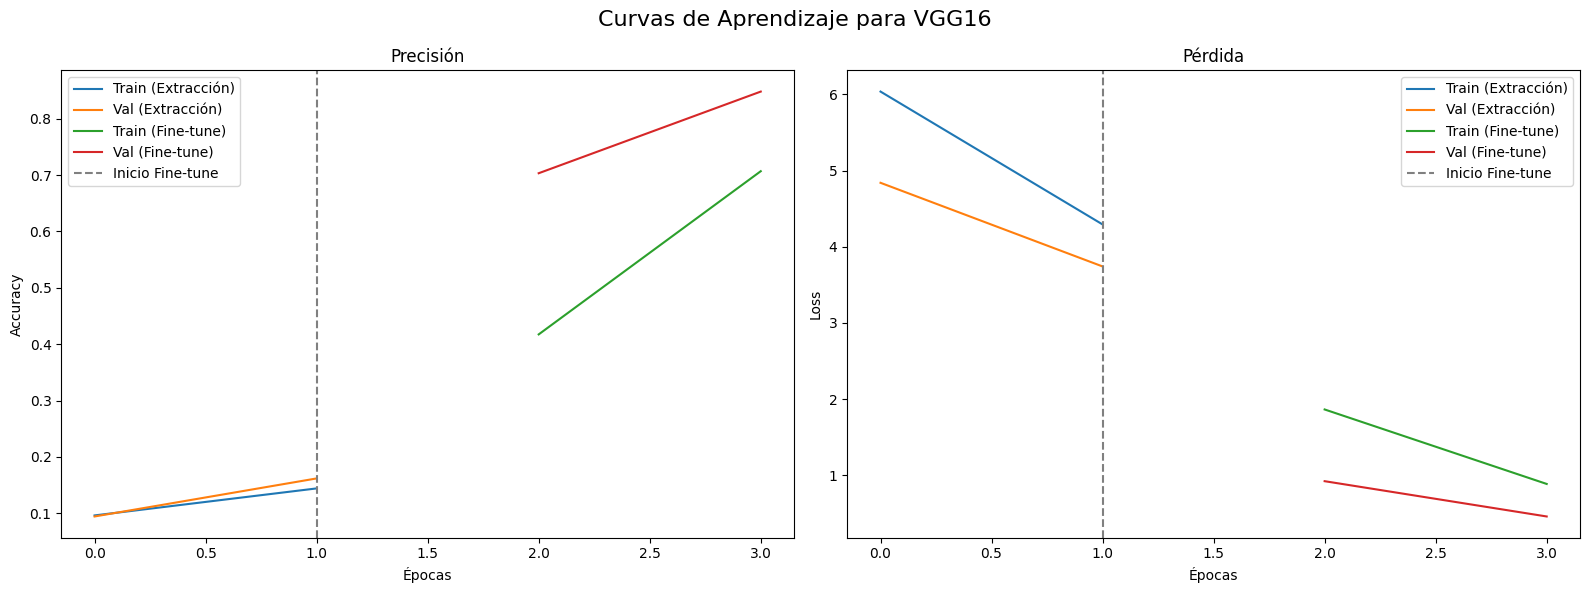


--- Iniciando entrenamiento para: ResNet50 ---
Found 3319 images belonging to 12 classes.
Found 711 images belonging to 12 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Epoch 1/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 107s 901ms/step - accuracy: 0.1536 - loss: 2.6306 - val_accuracy: 0.4599 - val_loss: 1.7298
Epoch 2/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 81s 781ms/step - accuracy: 0.3621 - loss: 1.8983 - val_accuracy: 0.5907 - val_loss: 1.3362
Epoch 1/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 115s 920ms/step - accuracy: 0.3865 - loss: 1.8483 - val_accuracy: 0.6596 - val_loss: 1.0241
Epoch 2/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 82s 793ms/step - accuracy: 0.6543 - loss: 1.1295 - val_accuracy: 0.8003 - val_loss: 0.5977
--- Entrenamiento para ResNet50 completado ---


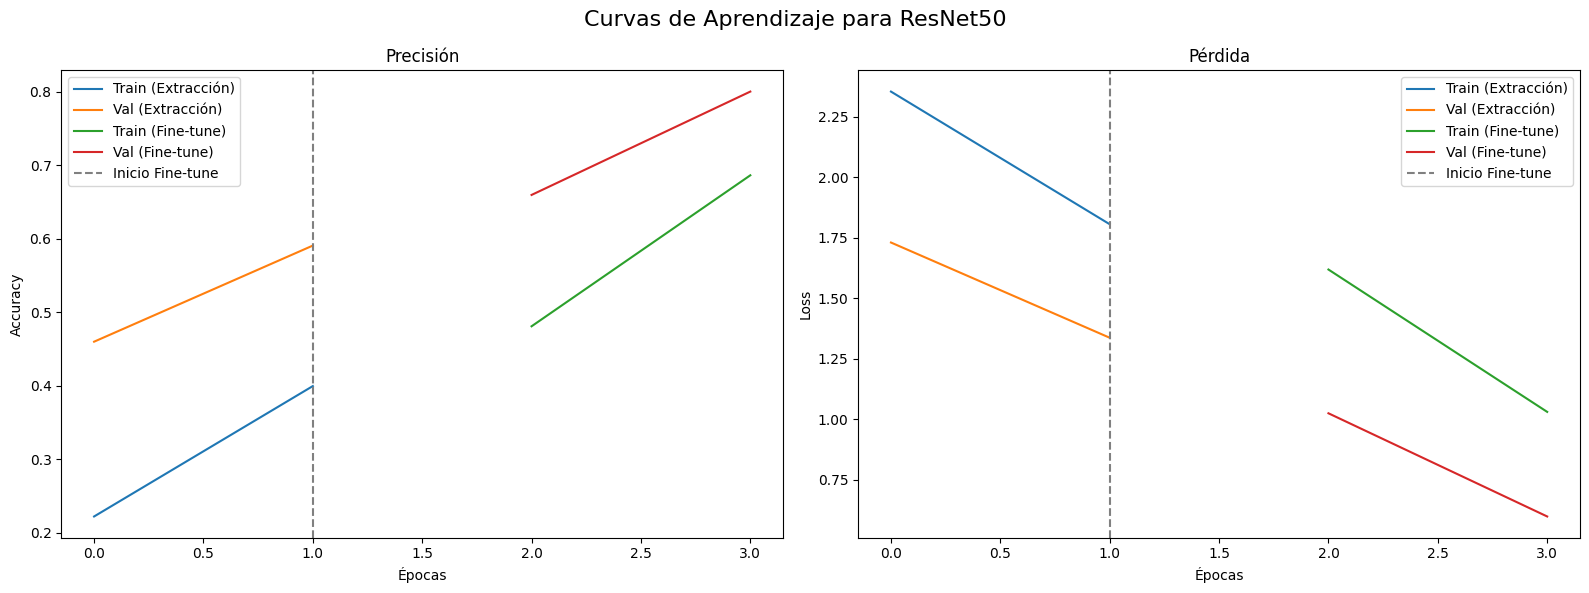


--- Iniciando entrenamiento para: Xception ---
Found 3319 images belonging to 12 classes.
Found 711 images belonging to 12 classes.
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.1785 - loss: 2.3803 - val_accuracy: 0.3010 - val_loss: 2.1215
Epoch 2/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 82s 792ms/step - accuracy: 0.3527 - loss: 2.0426 - val_accuracy: 0.4346 - val_loss: 1.8942
Epoch 1/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 120s 975ms/step - accuracy: 0.2022 - loss: 2.3270 - val_accuracy: 0.4754 - val_loss: 1.7950
Epoch 2/2
104/104 ━━━━━━━━━━━━━━━━━━━━ 85s 818ms/step - accuracy: 0.3812 - loss: 2.0309 - val_accuracy: 0.4965 - val_loss: 1.5310
--- Entrenamiento para Xception completado ---


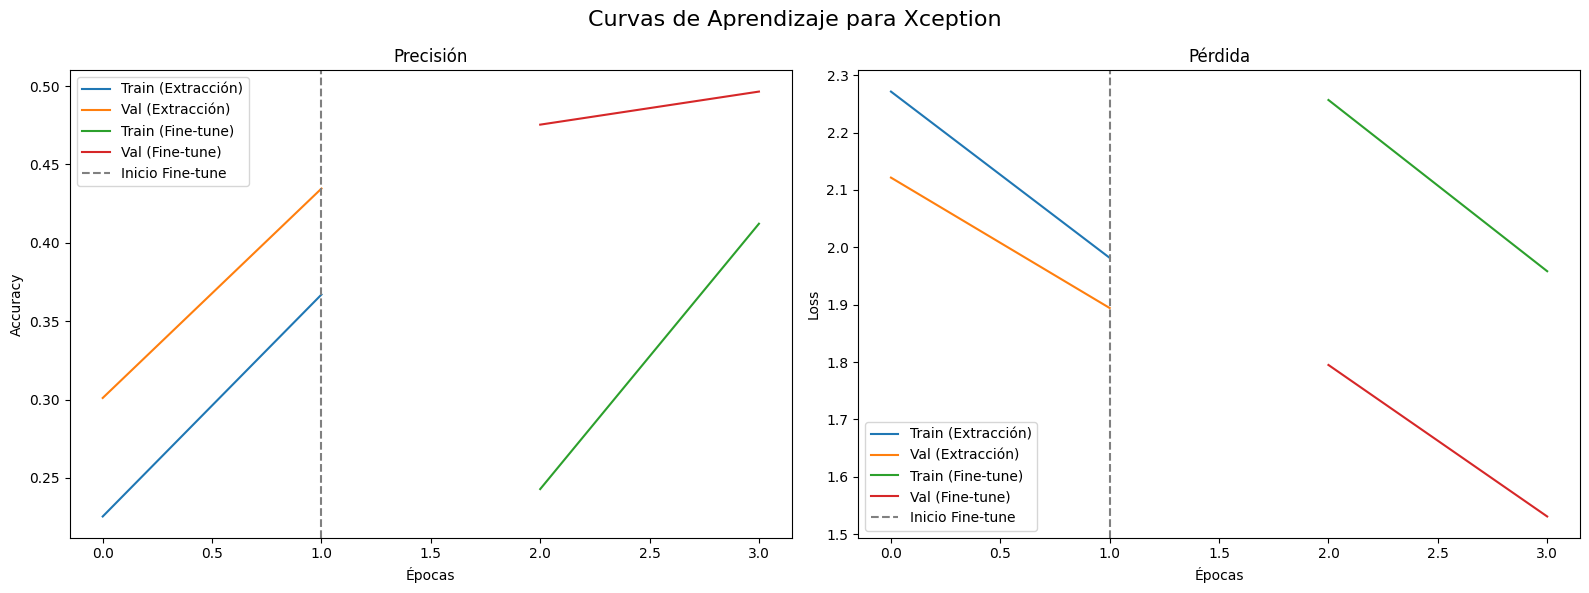

In [9]:
# Entrenamiento de todas las arquitecturas
results = {}
architectures = {
    "VGG16":    (VGG16, tf.keras.applications.vgg16.preprocess_input),
    "ResNet50": (ResNet50, tf.keras.applications.resnet50.preprocess_input),
    "Xception": (Xception, tf.keras.applications.xception.preprocess_input),
}

import matplotlib.pyplot as plt

def plot_history(history_extraction, history_fine_tune, model_name):
    plt.figure(figsize=(16, 6))
    plt.suptitle(f'Curvas de Aprendizaje para {model_name}', fontsize=16)

    # --- Precisión ---
    plt.subplot(1, 2, 1)
    plt.plot(history_extraction.history['accuracy'], label='Train (Extracción)')
    plt.plot(history_extraction.history['val_accuracy'], label='Val (Extracción)')
    plt.plot(range(len(history_extraction.history['accuracy']),
                   len(history_extraction.history['accuracy']) + len(history_fine_tune.history['accuracy'])),
             history_fine_tune.history['accuracy'], label='Train (Fine-tune)')
    plt.plot(range(len(history_extraction.history['val_accuracy']),
                   len(history_extraction.history['val_accuracy']) + len(history_fine_tune.history['val_accuracy'])),
             history_fine_tune.history['val_accuracy'], label='Val (Fine-tune)')
    plt.axvline(x=len(history_extraction.history['accuracy']) - 1, linestyle='--', color='gray', label='Inicio Fine-tune')
    plt.title('Precisión')
    plt.xlabel('Épocas')
    plt.ylabel('Accuracy')
    plt.legend()

    # --- Pérdida ---
    plt.subplot(1, 2, 2)
    plt.plot(history_extraction.history['loss'], label='Train (Extracción)')
    plt.plot(history_extraction.history['val_loss'], label='Val (Extracción)')
    plt.plot(range(len(history_extraction.history['loss']),
                   len(history_extraction.history['loss']) + len(history_fine_tune.history['loss'])),
             history_fine_tune.history['loss'], label='Train (Fine-tune)')
    plt.plot(range(len(history_extraction.history['val_loss']),
                   len(history_extraction.history['val_loss']) + len(history_fine_tune.history['val_loss'])),
             history_fine_tune.history['val_loss'], label='Val (Fine-tune)')
    plt.axvline(x=len(history_extraction.history['loss']) - 1, linestyle='--', color='gray', label='Inicio Fine-tune')
    plt.title('Pérdida')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()


for name, (model_class, preprocess_func) in architectures.items():
    model, hist_ext, hist_ft, _ = train_transfer_model(model_class, preprocess_func, name)
    results[name] = {'model': model}
    plot_history(hist_ext, hist_ft, name)
    model.save(os.path.join(BASE_FOLDER, f"{name.lower()}_model.h5"))


## 3.2. Evaluacion de las arquitecturas

In [10]:
# ==============================================================================
# SECCIÓN 6: EVALUACIÓN EN TEST Y COMPARACIÓN
# ==============================================================================
print(f"\n{'='*60}\n--- Evaluación Final en el Conjunto de Prueba ---\n{'='*60}")

for name, data in results.items():
    print(f"\nEvaluando {name}...")
    preprocess_func = architectures[name][1]
    test_datagen = ImageDataGenerator(preprocessing_function=preprocess_func)
    test_generator = test_datagen.flow_from_directory(
        TEST_DIR, target_size=(IMG_HEIGHT, IMG_WIDTH),
        batch_size=BATCH_SIZE, class_mode='categorical', shuffle=False
    )
    loss, accuracy = data['model'].evaluate(test_generator)
    results[name]['test_accuracy'] = accuracy
    results[name]['test_loss'] = loss



--- Evaluación Final en el Conjunto de Prueba ---

Evaluando VGG16...
Found 720 images belonging to 12 classes.
23/23 ━━━━━━━━━━━━━━━━━━━━ 15s 629ms/step - accuracy: 0.7823 - loss: 0.6407

Evaluando ResNet50...
Found 720 images belonging to 12 classes.
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 423ms/step - accuracy: 0.7507 - loss: 0.7868

Evaluando Xception...
Found 720 images belonging to 12 classes.
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 812ms/step - accuracy: 0.4174 - loss: 1.5992
